In [1]:
import sys
sys.path.append("..")
from model import experimental_model, experimental2d_model, grapher
from data import loader, data_generation
from helpers import helpers, plotter
from keras.callbacks import ModelCheckpoint
from inference import infer
import numpy as np
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf; import keras

Using TensorFlow backend.


In [4]:
# options: rbf, periodic
print('Kernel? rbf/rbf_noise/periodic/rbf_const_2D/rbf_rbf_2D')
kernel = input()
d = True if kernel.split('_')[-1] == '2D' else False
save_dir = '/Users/omernivron/Downloads/GPT_' + kernel

Kernel? rbf/rbf_noise/periodic/rbf_const_2D/rbf_rbf_2D
periodic


In [5]:
data = loader.load_data(kernel, size = 1, rewrite = 'False', d = d)

['pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy']


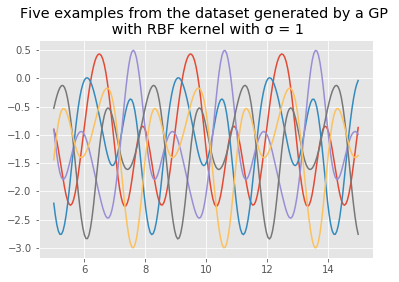

In [6]:
if d:
    plotter.plot_2d_examples(data[1], data[-3], data[-1])
else:
    plotter.plot_examples(data[0], data[4])

In [74]:
run = 1
name_comp = 'run_' + str(run) 
folder = save_dir + '/ckpt/check_' + name_comp; 

In [75]:
train_step, test_step, loss_object, train_loss, test_loss, m_tr, m_te = grapher.build_graph()

In [76]:
folder

'/Users/omernivron/Downloads/GPT_rbf_noise/ckpt/check_run_1'

In [77]:
ℯ = 512; l = [256, 256, 64, 32];  heads = 32; context = 50; order = True; consec = True
ℯ, l1, _, l2, l3 = helpers.load_spec(folder, ℯ, l, context_p = context, d = d); 

In [81]:
if d:
    decoder = experimental2d_model.Decoder(ℯ, l1, l2, l3, num_heads = heads)
else:
    decoder = experimental_model.Decoder(ℯ, l1, l2, l3, num_heads = heads, input_vocab_size = 200); 

In [82]:
optimizer_c = tf.keras.optimizers.Adam(3e-4)
ckpt = tf.train.Checkpoint(step=tf.Variable(1), optimizer = optimizer_c, net = decoder)
manager = tf.train.CheckpointManager(ckpt, folder, max_to_keep=3)
ckpt.restore(manager.latest_checkpoint)


If you intended to run this layer in float64, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float32 by default, call `tf.keras.backend.set_floatx('float32')`. To change just this layer, pass dtype='float32' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

sample # 0, r squared: -1.6982560272097644
sample # 1, r squared: -3.3807374884408166
sample # 2, r squared: -2.6218150213818854
sample # 3, r squared: -0.14194415602911037
sample # 4, r squared: -0.900103278422151
sample # 5, r squared: -0.9706155975395756
sample # 6, r squared: -2.81535862625028
sample # 7, r squared: -3.9452011422123237
sample # 8, r squared: -9.247736609361102
sample # 9, r squared: -12.398112455223988
sample # 10, r squared: -1.0741162718113624
sample # 11, r squared: -2.5536268178

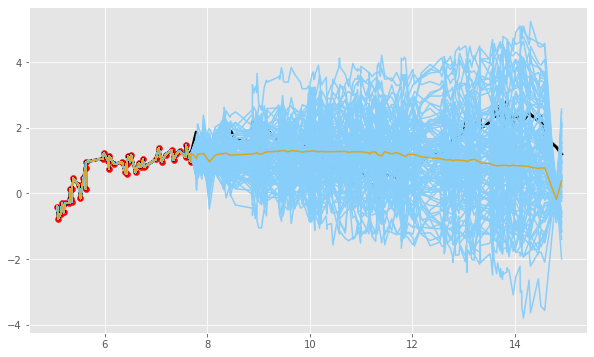

In [83]:
if d:
    idx = int(43)
    plotter.infer_plot2D(decoder, data[2][idx, :], data[6][idx, :], data[3][idx, :], data[0][idx, :], samples = 10, num_steps = 999, consec = consec, order = order)

else:  
    idx = int(1601)
    plotter.infer_plot(decoder, em = data[2][idx, :], x = data[1][idx, :], y = data[-1][idx, :], num_steps = 150, samples = 100, context_p = context, order = order, consec = consec)

['pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy']

If you intended to run this layer in float64, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float32 by default, call `tf.keras.backend.set_floatx('float32')`. To change just this layer, pass dtype='float32' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

sample # 0, r squared: -3.6213334748023076
sample # 1, r squared: -0.3343312275146819
sample # 2, r squared: -3.0414330999491552
sample # 3, r squared: -0.7564652831313443
sample # 4, r squared: -1.0780448641682336
sample # 5, r squared: -2.001159674215072
sample # 6, r squared: -2.7064385033889846
sample # 7, r squared: -6.998501174910057
sample # 8, r squared: -7.554057479202772
sample # 9, r squar

(50,) (350,) (174,)

If you intended to run this layer in float64, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float32 by default, call `tf.keras.backend.set_floatx('float32')`. To change just this layer, pass dtype='float32' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

Does not exists
(50,) (350,) (175,)

If you intended to run this layer in float64, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float32 by default, call `tf.keras.backend.set_floatx('float32')`. To change just this layer, pass dtype='float32' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocas

InvalidArgumentError: indices[0,0] = 292 is not in [0, 200) [Op:ResourceGather]

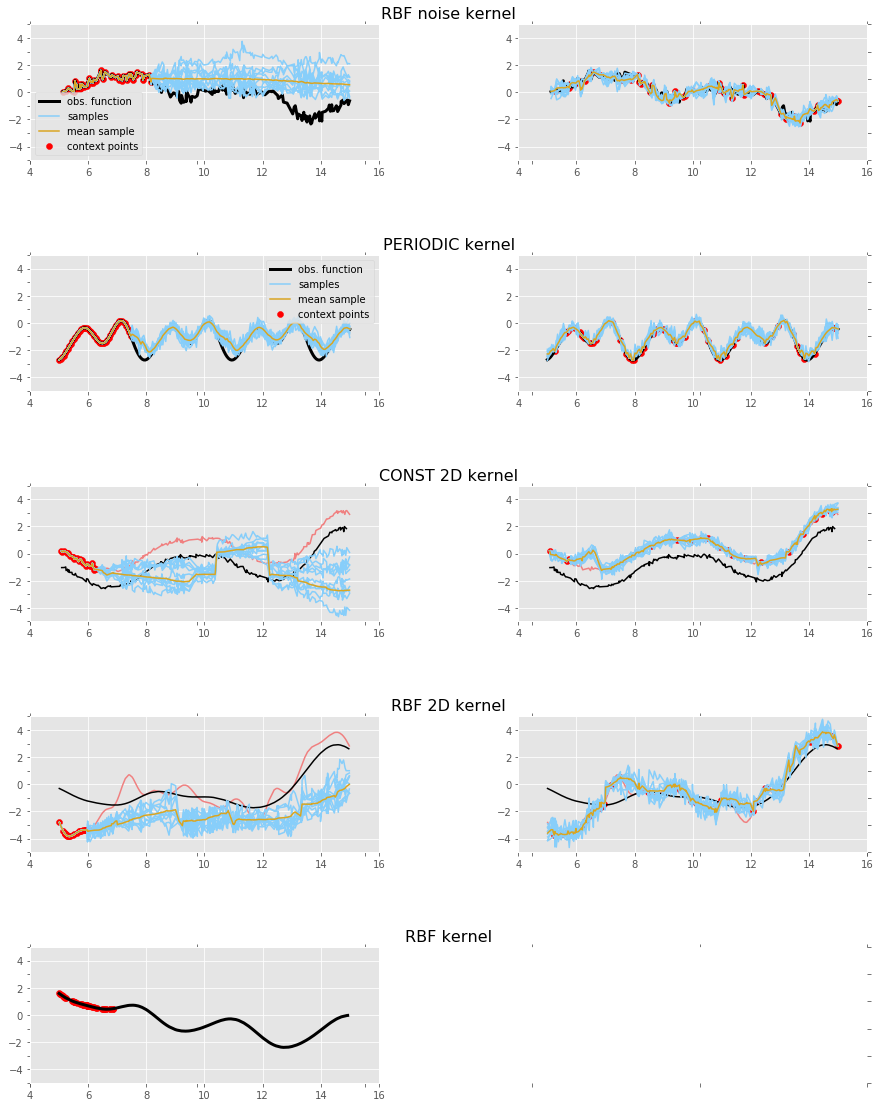

In [3]:
plotter.all_inference(consec = True)

['pad_pos_tr.npy', 'pad_pos_te.npy', 'em_te.npy', 'em_tr.npy', 'pad_y_fren_tr.npy', 'pad_y_fren_te.npy']
RBF(length_scale=1)
RBF(length_scale=1) + WhiteKernel(noise_level=0.5)
rbf [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.2293684  0.23395709 0.23735125 0.23874168
 0.24047823 0.24334757 0.2735979  0.30832113 0.32754954 0.3328625
 0.34095524 0.35490836 0.36005018 0.40111107 0.4095193  0.41419905
 0.44547121 0.47444871 0.50256782 0.51642026 0.51673215 0.5185707
 0.52226931 0.57897818 0.61996208 0.66336444 0.71519456 0.73614398
 0.76584758 0.7

/Users/omernivron/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


RBF(length_scale=1)
rbf [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.0153873  0.0212194  0.02392195 0.03698211
 0.03900701 0.06218407 0.0721267  0.07948685 0.09327177 0.09820546
 0.12007368 0.13432476 0.13730609 0.14199539 0.15136329 0.15555316
 0.1797511  0.26652114 0.28316269 0.30759162 0.37056594 0.43931645
 0.50719987 0.52514337 0.52790375 0.53179779 0.54794522 0.58223386
 0.583344   0.63313566 0.64282353 0.65307687 0.65657747 0.6645134
 0.70186045 0.72780314 0.730209   0.78242262 0.79459272 0.79961485
 0.80611595 0.80779573 0.81230129 0.

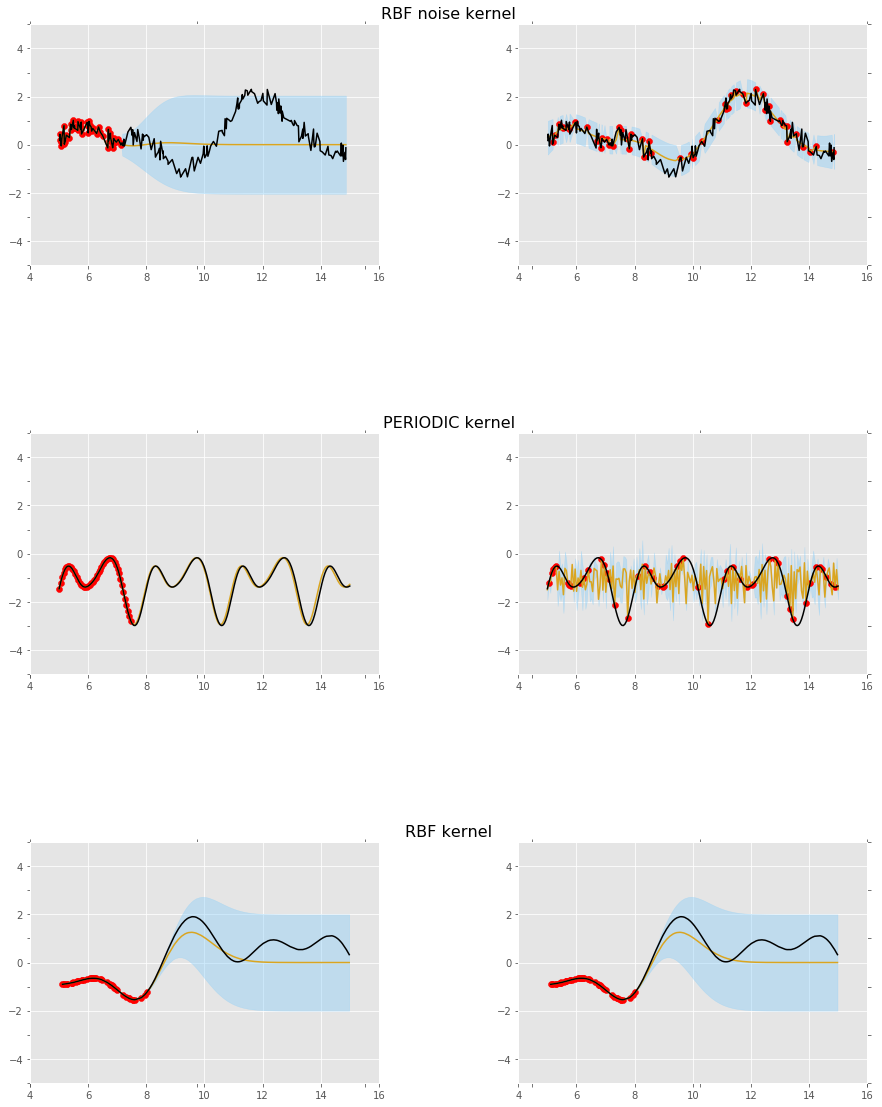

In [4]:
plotter.GP_infer1D()

In [24]:
import matplotlib.pyplot as plt

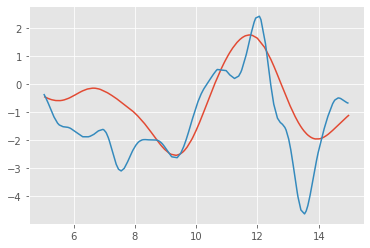

In [36]:
idx = int(43)
sor = np.argsort(data[2][idx, :])
sor2 = data[0][idx, :][sor]
plt.plot(data[2][idx, :][sor][sor2 == 1], data[-2][idx, :][sor][sor2==1])
plt.plot(data[2][idx, :][sor][sor2 == 0], data[-2][idx, :][sor][sor2==0])

In [19]:
import pandas as pd
import numpy as np

In [20]:
from sklearn.gaussian_process.kernels import ExpSineSquared, WhiteKernel, RBF

In [21]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [22]:
import matplotlib.pyplot as plt

In [36]:
x = np.random.uniform(5, 15, size=(1, 100 * 2))

In [37]:
sorted_idx = np.argsort(x)[0]

In [38]:
sorted_idx[0]

64

In [39]:
k = RBF()
gp = GaussianProcessRegressor(kernel=k)

In [40]:
k1 = RBF(0.4)
gp1 = GaussianProcessRegressor(kernel=k1)

In [48]:
y = gp.sample_y(x.reshape(-1, 1))
y1 = gp1.sample_y(x.reshape(-1, 1))
y2 = y + y1

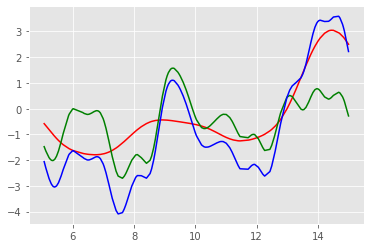

In [49]:
plt.plot(x.reshape(-1)[sorted_idx], y.reshape(-1)[sorted_idx], c = 'red')
plt.plot(x.reshape(-1)[sorted_idx], y1.reshape(-1)[sorted_idx], c= 'green')
plt.plot(x.reshape(-1)[sorted_idx], y2.reshape(-1)[sorted_idx], c= 'blue')
plt.show()

In [ ]:
df = np.zeros((num_obs * 2, seq_len * 2))
em_indices = np.zeros((num_obs, seq_len * 2))
em_indices_2 = np.zeros((num_obs, seq_len * 2))
rows = df.shape[0]; cols = df.shape[1]
tr_rows = int(tr_percent * rows)
tr_rows = tr_rows if tr_rows % 2 == 0 else tr_rows + 1
grid = np.arange(*grid_d)

for i in range(0, num_obs * 2, 2):
    x = np.random.uniform(5, 15, size=(1, seq_len * 2))

    idx = embder_map(1, [grid])
    idx.map_value_to_grid(x)

    if kernel == 'rbf':
        k = RBF()
        gp = GaussianProcessRegressor(kernel=k)

    if const:
        E = np.random.permutation(np.tile(np.random.normal(0, 2, 2), seq_len)).reshape(-1, 1)
        idd = (E == np.unique(E)[0])
        # print(idd)
        # print(idd.shape)
        σ = np.random.normal(0, 0.1, seq_len * 2).reshape(-1, 1)
        y = gp.sample_y(x.reshape(-1, 1)) + E + σ
    
    elif rbf:
        
    else:
        


    df[i, :x.shape[1]] = x
    df[i + 1, :x.shape[1]] = y.reshape(-1)
    em_indices[int(i / 2), :] = idx.idxs[0]
    em_indices_2[int(i / 2), idd.reshape(-1)] = 1

df_tr = df[:tr_rows, :]
df_te = df[tr_rows:, :]
em_tr = em_indices[:int((tr_rows) / 2), :]
em_te = em_indices[int((tr_rows) / 2):, :]
em_tr_2 = em_indices_2[:int((tr_rows) / 2), :]
em_te_2 = em_indices_2[int((tr_rows) / 2):, :]

# get all even rows
pad_pos_tr = df_tr[::2, :]
pad_pos_te = df_te[::2, :]
# get all odd rows
pad_y_fren_tr = df_tr[1::2, :]
pad_y_fren_te = df_te[1::2, :]

In [51]:
E = np.random.choice([0, 1], 50) 
idd = (E == np.unique(E)[0])

In [61]:
E = np.random.choice([0, 1], 200) 
idd = (E == np.unique(E)[0])
k1 = RBF(0.4)
gp1 = GaussianProcessRegressor(kernel = k1)
y = gp.sample_y(x.reshape(-1, 1)).reshape(-1) + gp1.sample_y(x.reshape(-1, 1)).reshape(-1) * E.reshape(-1)

In [6]:
f_x = x[:, np.where(E == 1)[0]]
f_y = y[np.where(E == 1)[0]]
plt.plot(np.sort(f_x).reshape(-1), f_y[np.argsort(f_x)].reshape(-1), c = 'gold')
s_x = x[:, np.where(E == 0)[0]]
s_y = y[np.where(E == 0)[0]]
plt.plot(np.sort(s_x).reshape(-1), s_y[np.argsort(s_x)].reshape(-1))

NameError: name 'x' is not defined

In [2]:
pad_pos_tr, pad_pos_te, pad_y_fren_tr, pad_y_fren_te, df_tr, df_te, em_tr, em_te, em_tr_2, em_te_2 = data_generation.data_gen2d(10, bias = 'rbf', noise = True)

In [4]:
pad_y_fren_tr

array([[ 1.51929456, -2.42017626,  2.4970218 , ...,  0.08789255,
         0.10868586, -0.46844587],
       [-1.81894541, -0.63019981, -1.22833115, ..., -1.88540338,
        -0.29465673, -1.86267239],
       [-3.40275189, -0.12067099, -1.82797953, ..., -0.87474225,
         1.13352   , -3.75873534],
       ...,
       [-0.48753782,  0.15299176, -3.14652122, ...,  1.12379686,
        -0.35236268, -1.16324419],
       [-0.59142012, -1.67688859,  1.19213156, ..., -2.85214614,
        -0.62594134, -0.68878651],
       [-1.21902462, -1.25545744, -3.31699366, ...,  0.2045199 ,
        -3.69964791, -1.8041544 ]])

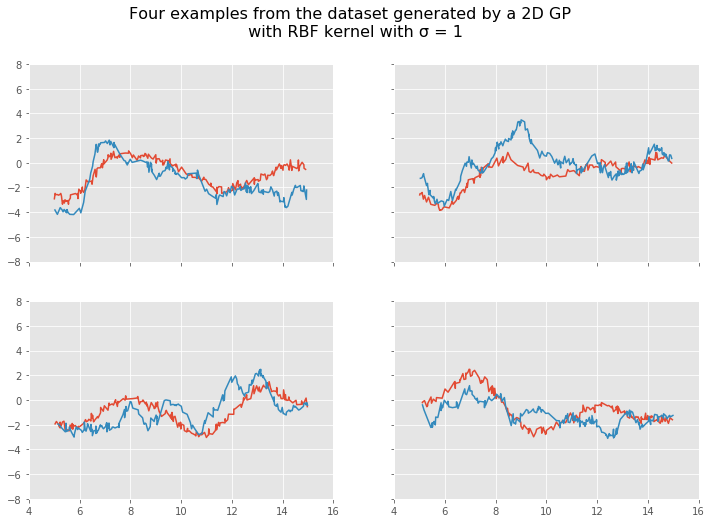

In [3]:
plotter.plot_2d_examples(pad_pos_tr, pad_y_fren_tr, em_tr_2)

In [123]:
data[1]

array([[ 5.00024021,  5.00225934,  5.13504707, ..., 14.86726922,
        14.92371173, 14.99771665],
       [ 7.31571508, 10.93462211,  8.8611806 , ..., 11.85880477,
        12.54614749,  5.73783806],
       [ 5.05411056,  5.13400986,  5.17358939, ..., 14.71517523,
        14.76756643, 14.95108422],
       ...,
       [ 5.21629563,  5.34589176,  6.1086011 , ..., 10.68488319,
         7.17413912, 14.49831365],
       [ 5.02703056,  5.09873277,  5.10249688, ..., 14.90120446,
        14.94060286, 14.98863379],
       [ 7.94298014, 13.42261682,  6.83936329, ...,  7.25450389,
         9.66057194,  7.38300554]])

In [10]:
from sklearn.gaussian_process import GaussianProcessRegressor

In [22]:
kernel1 = ExpSineSquared(periodicity=3.5)

In [23]:
model1 = GaussianProcessRegressor(kernel=kernel1)

In [24]:
data[1].shape

(30000, 200)

In [25]:
idx = int(1400) 
x1 = data[1][idx, :]; y1 = data[-1][idx, :]

In [26]:
sorted_idx = np.argsort(x1)
x2 = x1[sorted_idx]
y2 = y1[sorted_idx]

In [27]:
model1.fit(x2[:50].reshape(-1, 1), y2[:50].reshape(-1, 1))

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
                         kernel=ExpSineSquared(length_scale=1, periodicity=3.5),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [28]:
μ_tr, σ_tr = model1.predict(x2[50:].reshape(-1, 1), return_std=True)

/Users/omernivron/opt/anaconda3/lib/python3.7/site-packages/sklearn/gaussian_process/gpr.py:346: UserWarning: Predicted variances smaller than 0. Setting those variances to 0.
  warnings.warn("Predicted variances smaller than 0. "


In [29]:
import matplotlib
import matplotlib.pyplot as plt

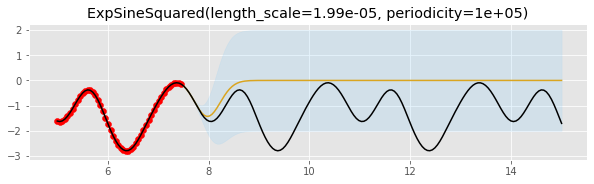

In [30]:
with matplotlib.rc_context({'figure.figsize': [10,2.5]}):
    plt.fill_between(x2[50:].reshape(-1), μ_tr.squeeze()-2*σ_tr, μ_tr.squeeze()+2*σ_tr, alpha=.2, color = 'lightskyblue')
    plt.plot(x2[50:].reshape(-1), μ_tr.squeeze(), color = "goldenrod")
    plt.plot(x2, y2, color='black')
    plt.scatter(x2[:50].reshape(-1, 1), y2[:50].reshape(-1, 1), color='red')
    plt.title(model1.kernel_)
plt.show()

In [55]:
x2[50]

7.782182587521095

In [54]:
y2[50]

-0.41153522264316844

In [53]:
μ_tr[0]

array([-0.41151908])

In [4]:
from sklearn.gaussian_process.kernels import ExpSineSquared, WhiteKernel, RBF

In [ ]:
ExpSineSquared(length_scale=1, periodicity=3)